In [1]:
import os
import numpy as np
import Cell_BLAST as cb
import utils
cb.config.RANDOM_SEED = 0
cb.config.N_JOBS = 4
fixed_model_kwargs = dict(
    latent_dim=10, cat_dim=20,
    epoch=500, patience=20
)

# ---
# Human
### Guo

/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,age,cell_ontology_class,cell_ontology_id,cell_type1,cluster_id,dataset_name,donor,full_name,organ,organism,platform
Donor2.AAACCTGGTGCCTTGG.1,24.0,spermatid,CL:0000018,elongated S'tids,6,Guo,Donor2,elongated spermatid,Testis,Homo sapiens,10x
Donor2.AAACCTGTCAACGGGA.1,24.0,sperm,CL:0000019,sperm,8,Guo,Donor2,sperm,Testis,Homo sapiens,10x
Donor2.AAACCTGTCCTATGTT.1,24.0,sperm,CL:0000019,sperm,8,Guo,Donor2,sperm,Testis,Homo sapiens,10x
Donor2.AAACCTGTCGGACAAG.1,24.0,sperm,CL:0000019,sperm,8,Guo,Donor2,sperm,Testis,Homo sapiens,10x
Donor2.AAACGGGAGCTATGCT.1,24.0,sperm,CL:0000019,sperm,7,Guo,Donor2,sperm,Testis,Homo sapiens,10x


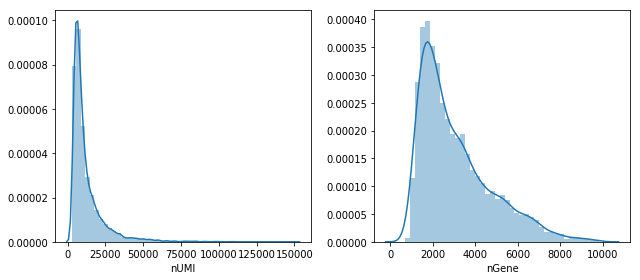

In [2]:
guo = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Guo/data.h5")
utils.peek(guo, "Guo")
guo = guo.normalize()
guo.obs.head()

In [3]:
opt_model_kwargs = dict(batch_effect="donor")
guo_model = cb.directi.fit_DIRECTi(
    guo, guo.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/Guo/model_0"
)
guo.latent = guo_model.inference(guo)

[DIRECTi epoch 0] train=2.412, val=2.468, time elapsed=2.1s Regular save...
[DIRECTi epoch 1] train=2.395, val=2.442, time elapsed=0.7s
[DIRECTi epoch 2] train=2.330, val=2.210, time elapsed=0.7s
[DIRECTi epoch 3] train=1.492, val=1.264, time elapsed=0.6s
[DIRECTi epoch 4] train=0.948, val=1.040, time elapsed=0.6s
[DIRECTi epoch 5] train=0.891, val=0.960, time elapsed=0.7s
[DIRECTi epoch 6] train=0.857, val=0.932, time elapsed=0.7s
[DIRECTi epoch 7] train=0.832, val=0.886, time elapsed=0.7s
[DIRECTi epoch 8] train=0.819, val=0.868, time elapsed=0.6s
[DIRECTi epoch 9] train=0.807, val=0.851, time elapsed=0.7s
[DIRECTi epoch 10] train=0.799, val=0.821, time elapsed=0.6s Regular save...
[DIRECTi epoch 11] train=0.786, val=0.811, time elapsed=0.6s
[DIRECTi epoch 12] train=0.779, val=0.805, time elapsed=0.6s
[DIRECTi epoch 13] train=0.773, val=0.796, time elapsed=0.6s
[DIRECTi epoch 14] train=0.769, val=0.806, time elapsed=0.6s
[DIRECTi epoch 15] train=0.762, val=0.790, time elapsed=0.6s
[D

[  Info   ] Computing tSNE...


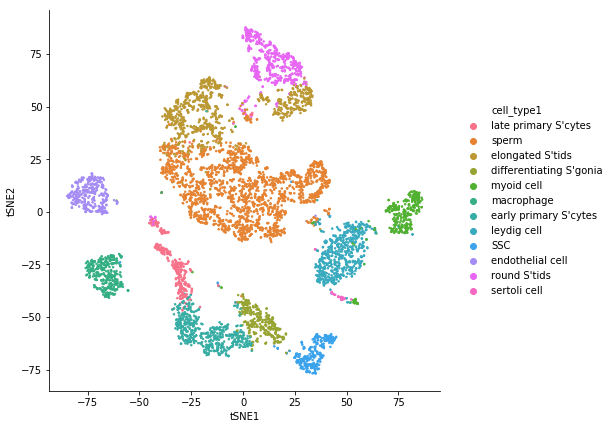

In [4]:
plot = guo.visualize_latent("cell_type1")
plot.get_figure().savefig("Guo/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


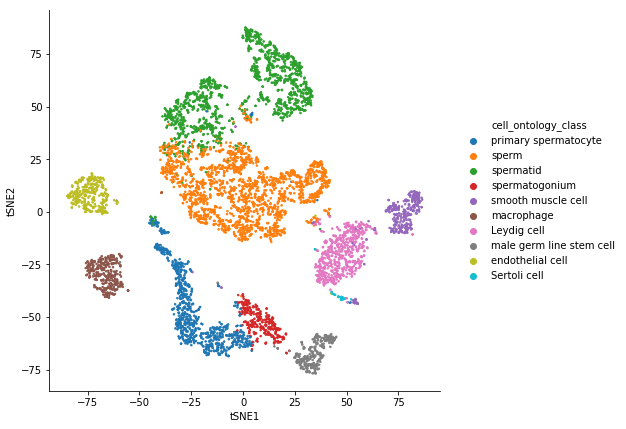

In [5]:
plot = guo.visualize_latent("cell_ontology_class")
plot.get_figure().savefig("Guo/cell_ontology_class.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


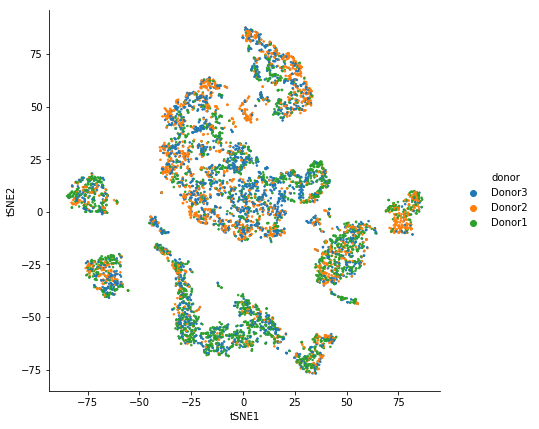

In [6]:
plot = guo.visualize_latent("donor")
plot.get_figure().savefig("Guo/donor.pdf", bbox_inches="tight")

In [7]:
%%capture capio
guo_models = [guo_model]
opt_model_kwargs = dict(batch_effect="donor")
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    guo_models.append(cb.directi.fit_DIRECTi(
        guo, guo.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/Guo/model_%d" % i
    ))
guo_blast = cb.blast.BLAST(guo_models, guo, 
                                               keep_exprs=True).build_empirical()
guo_blast.save("Guo")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Guo/model_1/checkpoint-146
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Guo/model_2/checkpoint-100
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Guo/model_3/checkpoint-164


In [8]:
with open("Guo/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Guo/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [9]:
utils.self_projection(guo_blast, "Guo")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...


/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:313: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)


Coverage = 0.9863
Accuracy = 0.9803
